### Imports and configs 

In [1]:
# Imports 
import os 
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [ ]:
# Defining configs and paths 
DATA_PATHS = {
    "train_dir": "cnn_car_scratch_data/train", 
    "test_dir": "cnn_car_scratch_data/val", 
    "save_dir": "model_checkpoints/"
}

CONFIGS = {
    "BATCH_SIZE": 32, 
    "EPOCHS": 90
}

### Data loading and Visualization

In [2]:
# Defining the augmentation techniques - horizontal flip, zoom range, shear range 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Loading the data set 
x_train = train_datagen.flow_from_directory(DATA_PATHS["train_dir"], target_size = (64, 64), batch_size = CONFIGS["BATCH_SIZE"], class_mode = "categorical")
x_test = test_datagen.flow_from_directory(DATA_PATHS["test_dir"], target_size = (64, 64), batch_size = CONFIGS["BATCH_SIZE"], class_mode = "categorical")

Found 2653 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [5]:
CONFIGS["STEPS_PER_EPOCH"] = int(x_train.samples / CONFIGS["BATCH_SIZE"])
CONFIGS["VALIDATION_STEPS"] = int(x_test.samples / CONFIGS["BATCH_SIZE"])

In [6]:
def plot_sample_images(data_generator, num_images=6):
    images, labels = next(data_generator)
    class_names = list(data_generator.class_indices.keys())

    batch_size = images.shape[0]
    num_images = min(num_images, batch_size)  
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])  
        ax.axis('off')
        label_index = np.argmax(labels[i])  
        ax.set_title(class_names[label_index])
    
    plt.show()

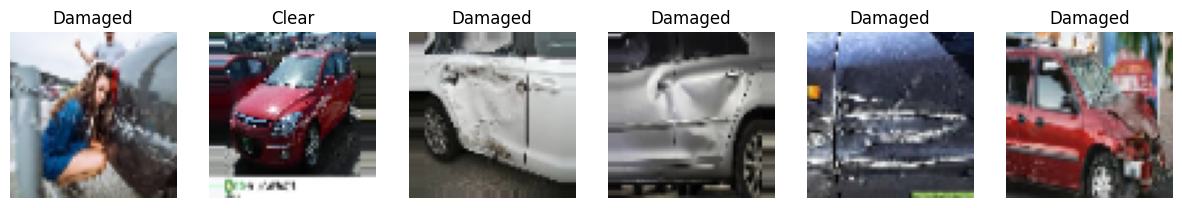

In [7]:
plot_sample_images(x_train, num_images=6)

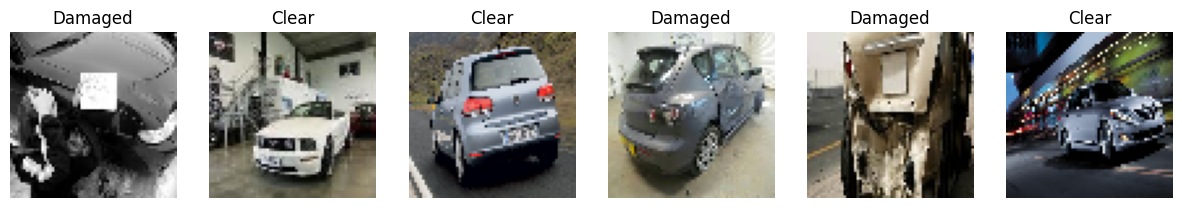

In [8]:
plot_sample_images(x_test, num_images=6)

### CNN Architecture

In [9]:
# Building the CNN architecture 
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), input_shape = (64, 64, 3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())

# Adding hidden layer 
cnn.add(Dense(units = 128, kernel_initializer = 'random_uniform', activation = 'relu'))

# Adding the output layer with 2 units as we have 2 classes
cnn.add(Dense(units = 2, kernel_initializer = 'random_uniform', activation = 'softmax'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Train

In [11]:
history = cnn.fit_generator(x_train, steps_per_epoch=CONFIGS["STEPS_PER_EPOCH"], epochs=CONFIGS["EPOCHS"], validation_data=x_test, validation_steps=CONFIGS["VALIDATION_STEPS"])

Epoch 1/90


C:\Users\Sania\AppData\Local\Temp\ipykernel_19544\2041086042.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(x_train, steps_per_epoch=CONFIGS["STEPS_PER_EPOCH"], epochs=CONFIGS["EPOCHS"], validation_data=x_test, validation_steps=CONFIGS["VALIDATION_STEPS"])


82/82 [==============================] - 11s 139ms/step - loss: 0.1017 - accuracy: 0.9630 - val_loss: 0.8541 - val_accuracy: 0.7902
Epoch 2/90
82/82 [==============================] - 11s 136ms/step - loss: 0.1019 - accuracy: 0.9668 - val_loss: 0.7444 - val_accuracy: 0.8103
Epoch 3/90
82/82 [==============================] - 11s 134ms/step - loss: 0.0860 - accuracy: 0.9718 - val_loss: 0.9418 - val_accuracy: 0.7946
Epoch 4/90
82/82 [==============================] - 11s 137ms/step - loss: 0.1011 - accuracy: 0.9641 - val_loss: 0.8681 - val_accuracy: 0.7924
Epoch 5/90
82/82 [==============================] - 11s 132ms/step - loss: 0.0873 - accuracy: 0.9657 - val_loss: 0.8667 - val_accuracy: 0.7924
Epoch 6/90
82/82 [==============================] - 10s 123ms/step - loss: 0.0795 - accuracy: 0.9695 - val_loss: 0.9388 - val_accuracy: 0.7790
Epoch 7/90
82/82 [==============================] - 10s 117ms/step - loss: 0.0872 - accuracy: 0.9683 - val_loss: 0.9765 - val_accuracy: 0.7879
Epoch 8/90

82/82 [==============================] - 11s 132ms/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 1.5317 - val_accuracy: 0.7835
Epoch 59/90
82/82 [==============================] - 11s 134ms/step - loss: 0.0381 - accuracy: 0.9874 - val_loss: 1.4231 - val_accuracy: 0.7634
Epoch 60/90
82/82 [==============================] - 11s 132ms/step - loss: 0.0477 - accuracy: 0.9859 - val_loss: 1.5778 - val_accuracy: 0.7500
Epoch 61/90
82/82 [==============================] - 11s 131ms/step - loss: 0.0327 - accuracy: 0.9889 - val_loss: 1.4527 - val_accuracy: 0.7723
Epoch 62/90
82/82 [==============================] - 11s 138ms/step - loss: 0.0442 - accuracy: 0.9889 - val_loss: 1.5250 - val_accuracy: 0.7746
Epoch 63/90
82/82 [==============================] - 11s 132ms/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 1.2686 - val_accuracy: 0.7969
Epoch 64/90
82/82 [==============================] - 11s 132ms/step - loss: 0.0365 - accuracy: 0.9889 - val_loss: 1.4038 - val_accuracy: 0.7567
Epoc

### Visualize accuracy and loss trends 

In [12]:
def plot_curves(train_curve, val_curve, plot_type):     
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(CONFIGS["EPOCHS"]), train_curve, label=f'Train {plot_type}')
    plt.plot(range(CONFIGS["EPOCHS"]), val_curve, label=f'Validation {plot_type}')
    plt.title(f'{plot_type} trends')
    plt.xlabel('Epochs')
    plt.ylabel(plot_type)
    plt.legend()
    plt.show()

In [13]:
# Extract loss and accuracy values
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

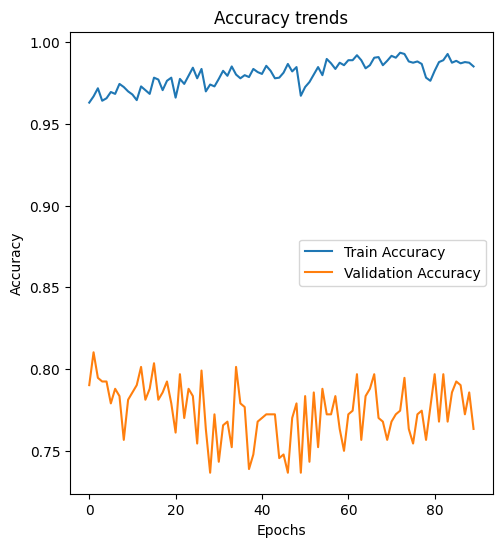

In [14]:
plot_curves(train_acc, val_acc, "Accuracy")

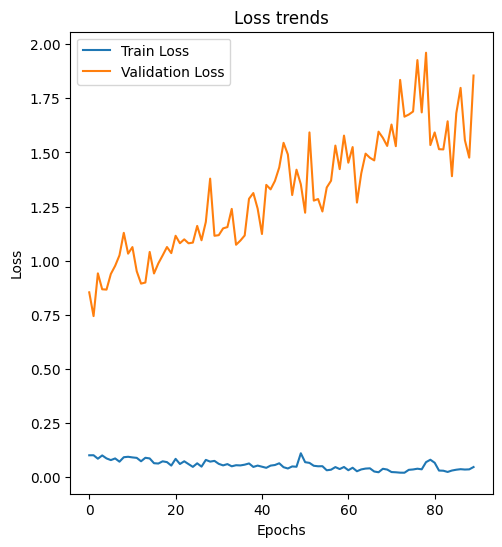

In [15]:
plot_curves(train_loss, val_loss, "Loss")

### Save model 

In [18]:
# Saving model 
cnn.save(os.path.join(DATA_PATHS["save_dir"], "cnn_filter.h5"))